In [22]:
import pandas as pd

#Load the dataset
df = pd.read_csv('netflix_titles.csv')

#Preview the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [23]:
# General info: columns, data types, non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [24]:
# Summary of categorical and numeric columns
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [25]:
# Check for missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [26]:
# Drop rows where some valuies are missing (critical columns)
df = df.dropna(subset=['rating', 'duration','date_added'])

# Fill missing values for 'director' and 'cast' with "Unknown"
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

# Fill missing country with "Unknown"
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [27]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      88
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [28]:
# Create 'year_added' and 'month_added' columns
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

In [29]:
df[['title', 'date_added', 'year_added', 'month_added']].head()

,title,date_added,year_added,month_added
0,Dick Johnson Is Dead,2021-09-25,2021.0,September
1,Blood & Water,2021-09-24,2021.0,September
2,Ganglands,2021-09-24,2021.0,September
3,Jailbirds New Orleans,2021-09-24,2021.0,September
4,Kota Factory,2021-09-24,2021.0,September


#### **What's the earliest and latest year of release?**

In [30]:
earliest = int(df['year_added'].min())
latest = int(df['year_added'].max())

print(f"Earliest Year: {earliest}")
print(f"Latest Year: {latest}")


Earliest Year: 2008
Latest Year: 2021


#### **What's the most common month for adding content for adding content to Netflix?**

In [31]:
df['month_added'].value_counts().head()

month_added
July         819
December     796
September    764
April        758
October      755
Name: count, dtype: int64

## **Movies vs TV Shows**

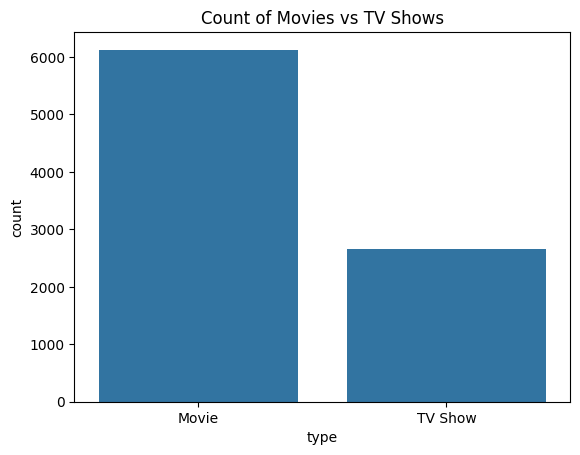

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of each type
sns.countplot(data=df, x='type')
plt.title("Count of Movies vs TV Shows")
plt.show()

## **Content Added Over Time**

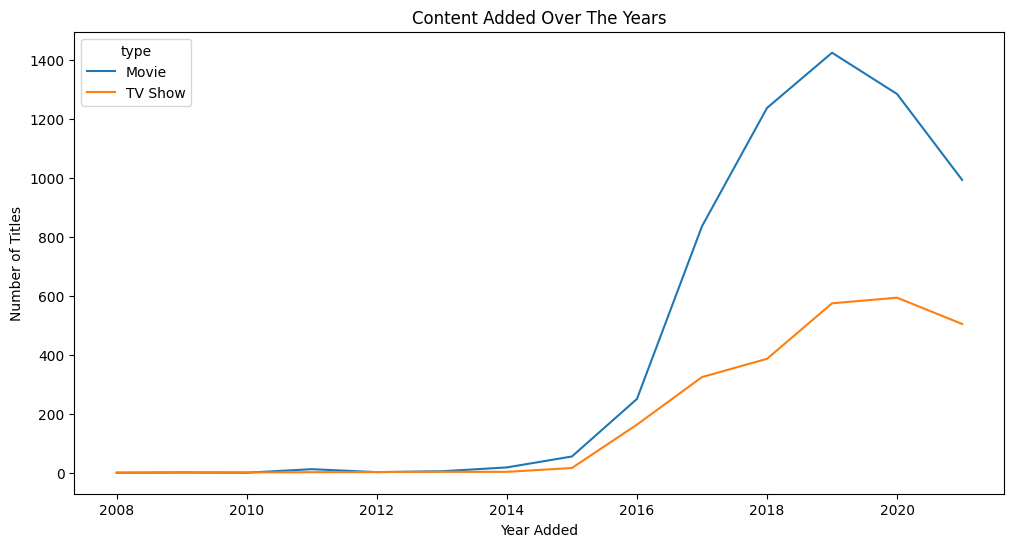

In [34]:
content_per_year = df.groupby(['year_added', 'type']).size().reset_index(name='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=content_per_year, x='year_added', y='count', hue='type')
plt.title("Content Added Over The Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()

## **Top Contributing Countries**

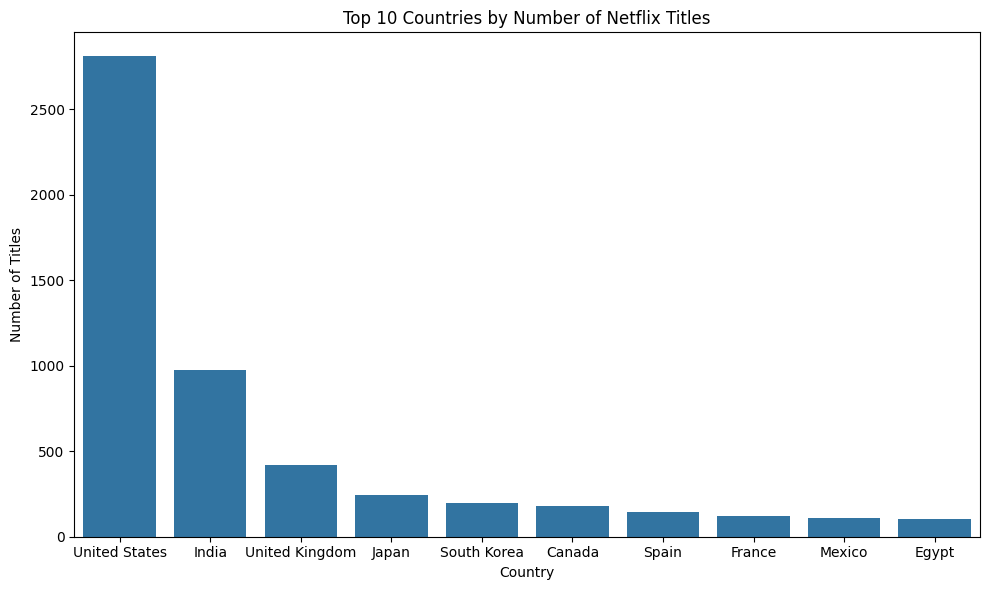

In [49]:
# Exclude 'Unknown' entries
country_counts = df[df['country'] != 'Unknown']['country'].value_counts().head(10)

# Plot with spacing
plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title("Top 10 Countries by Number of Netflix Titles")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.tight_layout()  # Fix for overlapping labels
plt.show()


## **Most Common Genres**

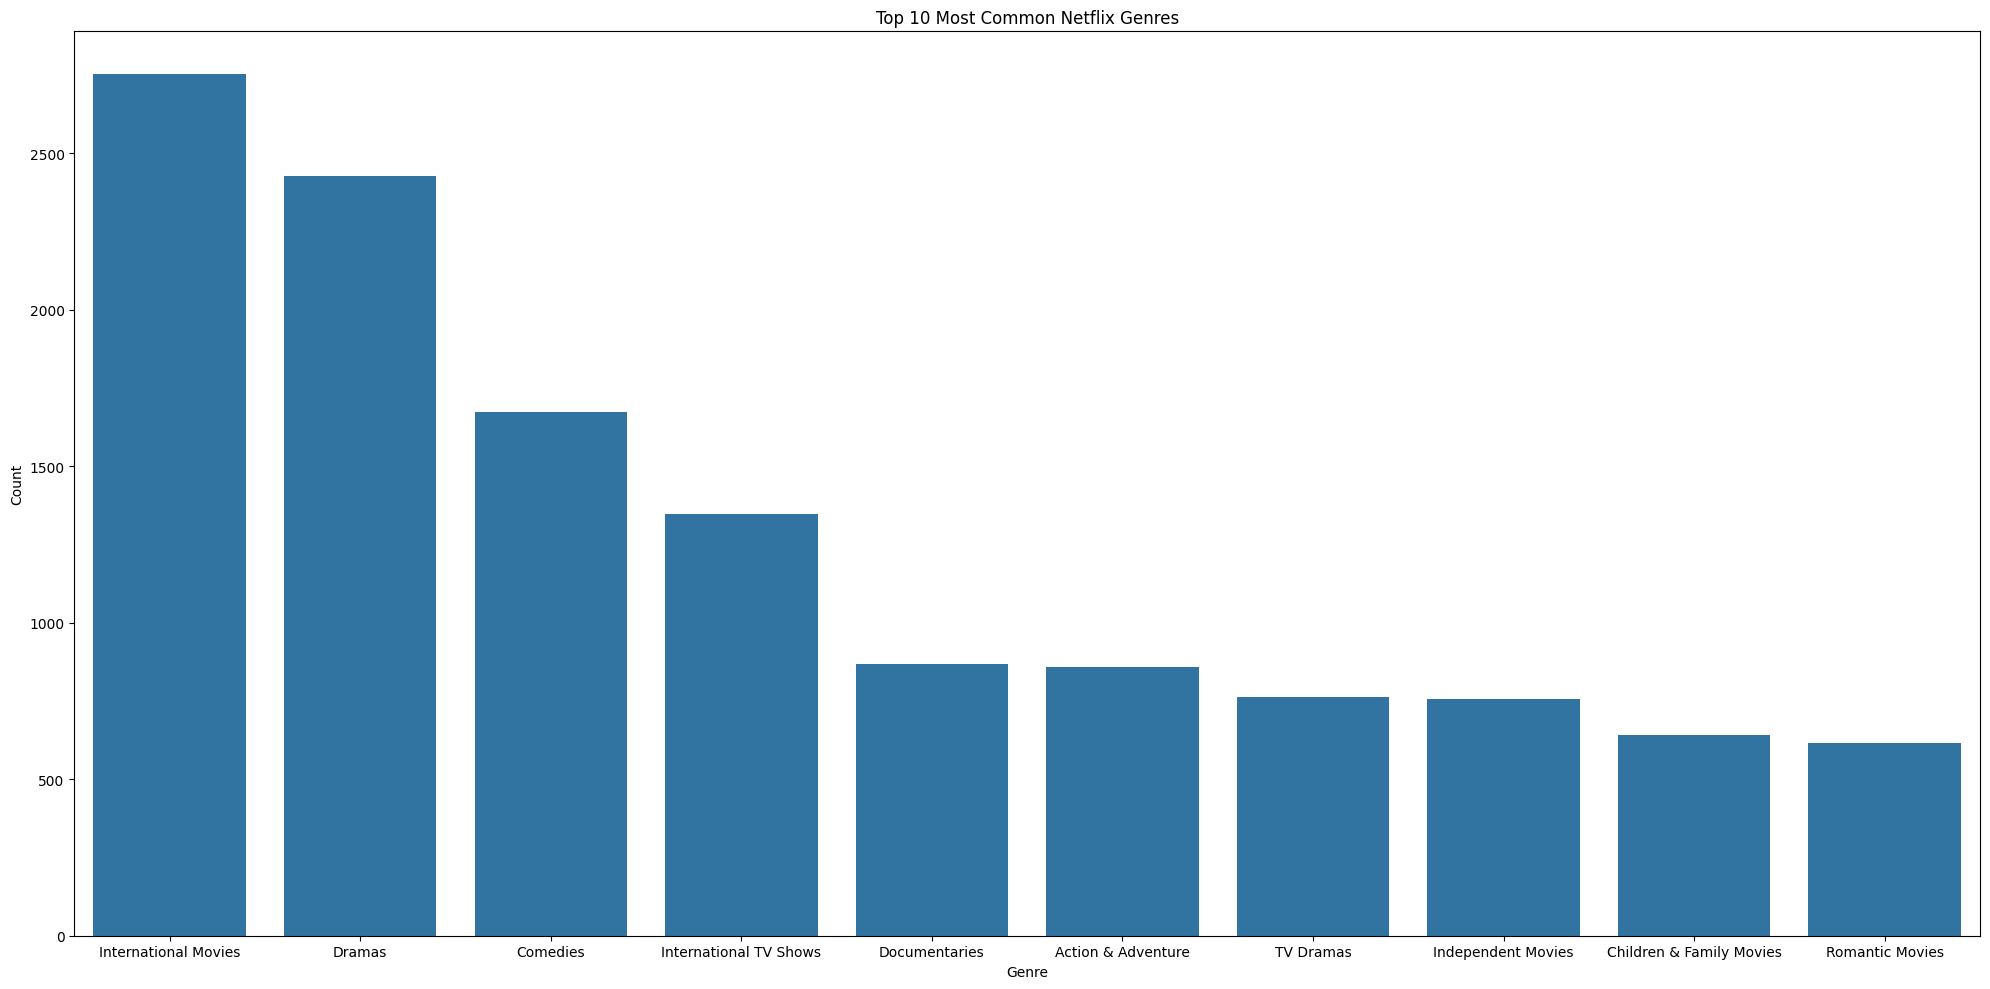

In [59]:
# Split genre strings into a list
all_genres = df['listed_in'].dropna().str.split(', ')

# Flatten the list and count
from collections import Counter
genre_counts = Counter([genre for sublist in all_genres for genre in sublist])

# Convert to DataFrame
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False)

# Plot top 10 genres
plt.figure(figsize=(20,10))
sns.barplot(data=genre_df.head(10), x='Genre', y='Count')
plt.title("Top 10 Most Common Netflix Genres")
plt.tight_layout()
plt.show()

## **Rating Distribution**

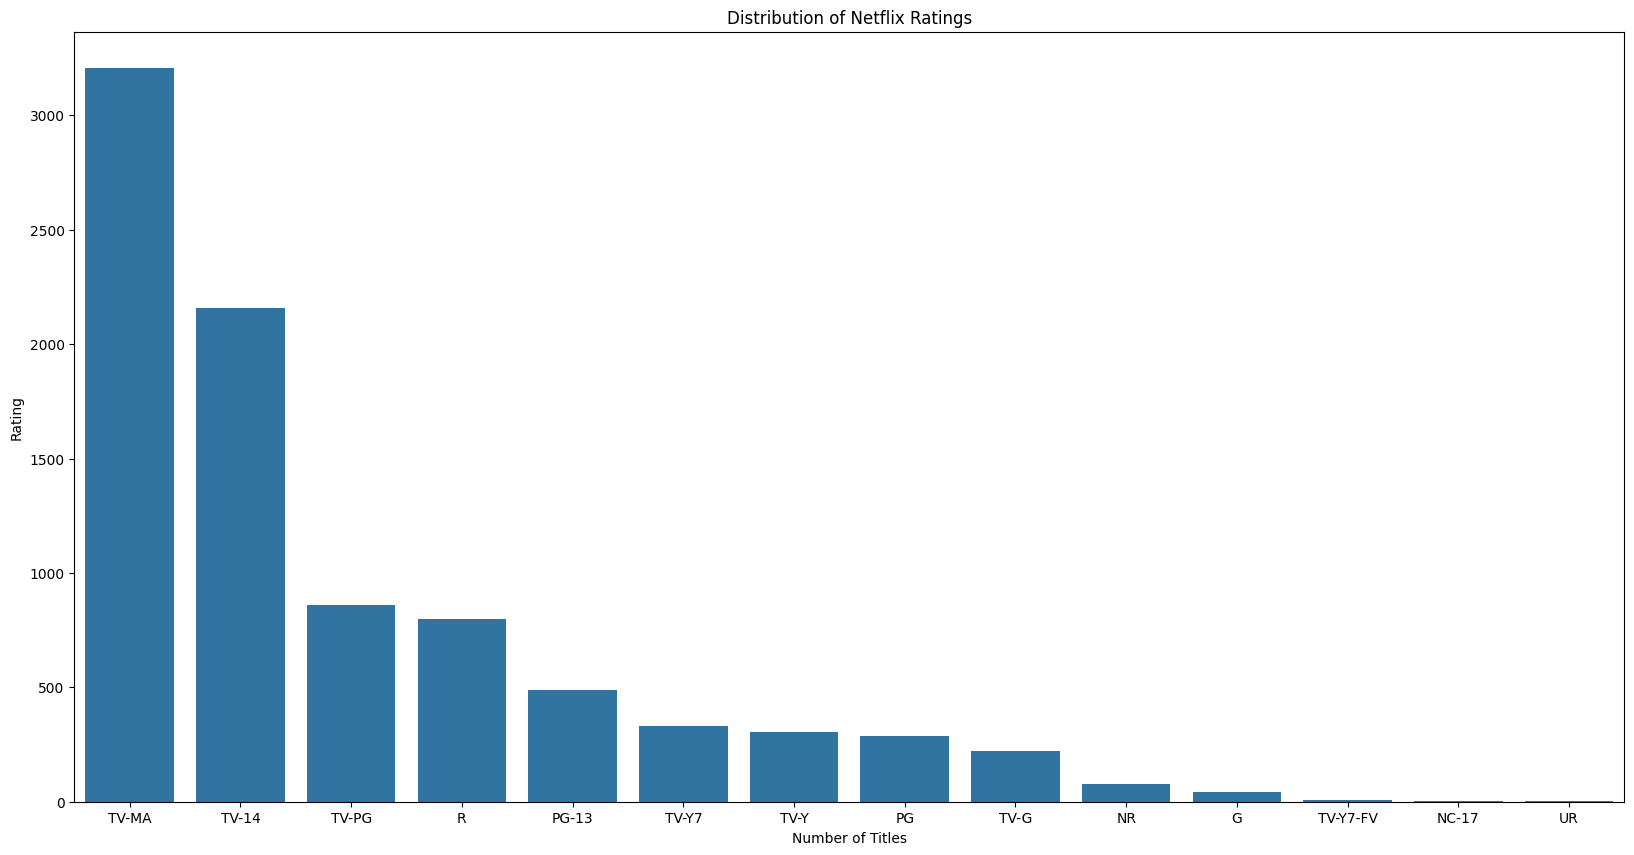

In [75]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title("Distribution of Netflix Ratings")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.show()

## **Top Directors**

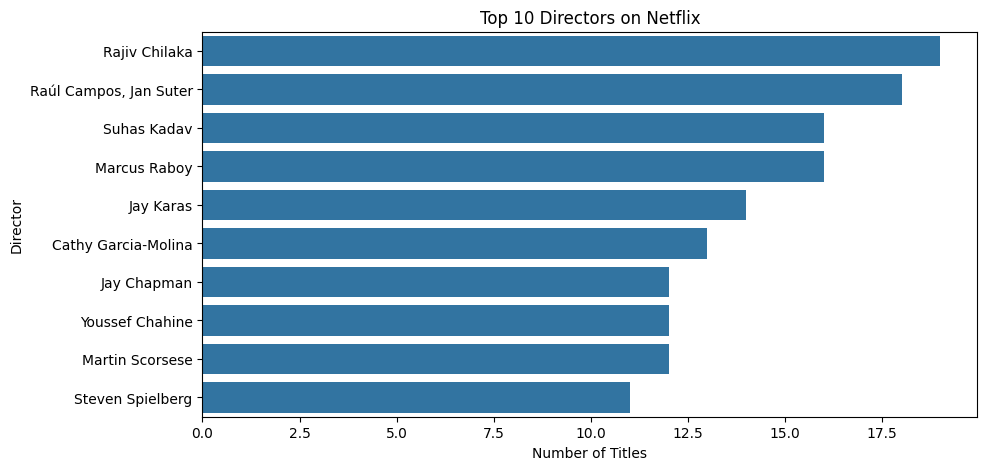

In [79]:
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

## **Top Actors**

                    Actor  Count
1433          Anupam Kher     43
782        Shah Rukh Khan     35
303         Julie Tejwani     33
1634     Naseeruddin Shah     32
4942     Takahiro Sakurai     32
...                   ...    ...
36371  Jessica Gee-George      1
36370    Michael Johnston      1
36369        Emrah Girgin      1
36368         Saygin Asan      1
15          Sandi Schultz      1

[36392 rows x 2 columns]


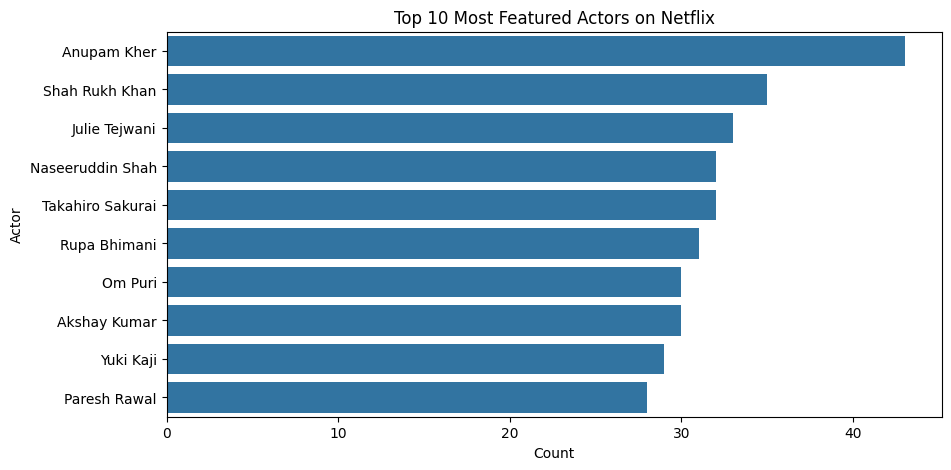

In [94]:
df = df[df['cast'].apply(lambda x: 'Unknown' not in x)].reset_index(drop=True)
all_cast = df['cast'].dropna().str.split(', ')

actor_counts = Counter(actor for sublist in all_cast for actor in sublist)

# Convert to DataFrame
actor_df = pd.DataFrame(actor_counts.items(), columns=['Actor', 'Count'])
actor_df = actor_df.sort_values(by='Count', ascending=False)
print(actor_df)

# Top 10 actors
plt.figure(figsize=(10,5))
sns.barplot(data=actor_df.head(10), x='Count', y='Actor')
plt.title("Top 10 Most Featured Actors on Netflix")
plt.show()



## **Most Common Words in Netflix Show Titles**

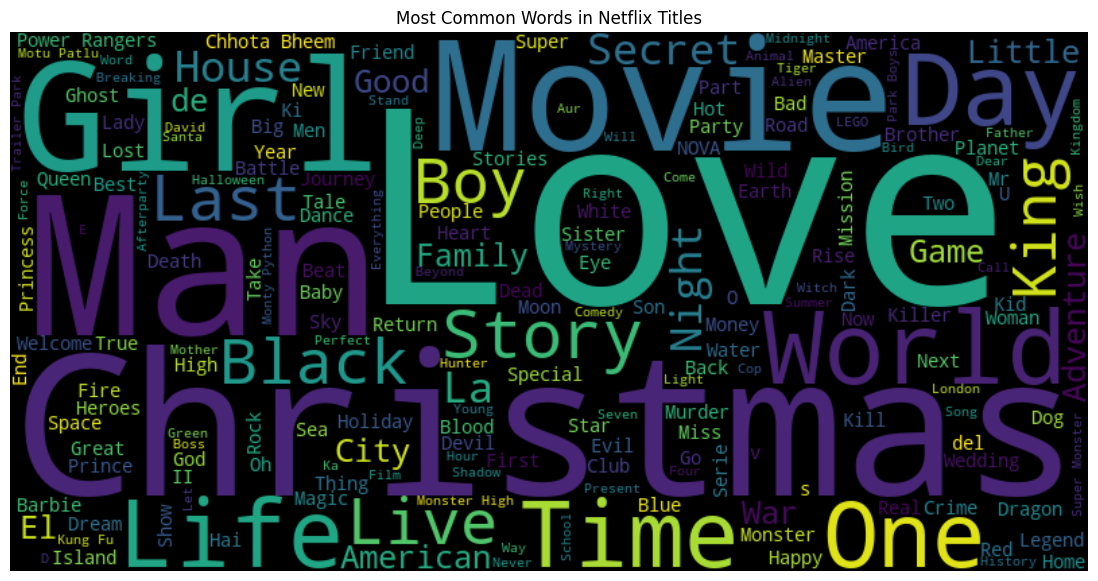

In [98]:
from wordcloud import WordCloud

#Join all titles into one big string
title_text = ' '.join(df['title'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(title_text)

#Display It
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Netflix Titles")
plt.show()


# **Prediction Model**

In [101]:
df_ai = df[['type', 'rating', 'duration', 'year_added', 'country']].dropna()

# Convert 'type' to numeric (target)
df_ai['type'] = df_ai['type'].map({'Movie': 0, 'TV Show': 1})

# Simplify 'duration' column
# For movies, it's in minutes ("100 min"), for shows it's like "2 Seasons"
df_ai['duration_int'] = df_ai['duration'].str.extract(r'(\d+)').astype(int)
df_ai['duration_type'] = df_ai['duration'].str.extract(r'([a-zA-Z]+)').fillna('Unknown')

# One-hot encode categorical features
df_ai = pd.get_dummies(df_ai, columns=['rating', 'duration_type', 'country'], drop_first=True)

# Drop original 'duration'
df_ai = df_ai.drop(columns=['duration'])

### Split into train/test

In [107]:
from sklearn.model_selection import train_test_split
# Features and target
X = df_ai.drop(['type', 'duration_int'], axis=1)
y = df_ai['type']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_test)
print("-----")


      year_added  rating_NC-17  rating_NR  rating_PG  rating_PG-13  rating_R  \
1402      2020.0         False      False      False         False     False   
6530      2020.0         False      False      False         False      True   
5313      2016.0         False      False      False         False     False   
5422      2018.0         False      False      False         False     False   
5167      2016.0         False      False      False         False     False   
...          ...           ...        ...        ...           ...       ...   
5572      2020.0         False      False      False         False      True   
7054      2016.0         False      False      False         False     False   
5695      2019.0         False      False      False          True     False   
4856      2017.0         False      False      False         False     False   
7844      2019.0         False      False      False          True     False   

      rating_TV-14  rating_TV-G  rating

### Train a Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Create the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

#Train it
model.fit(X_train, y_train)

#Predict on test set
y_pred = model.predict(X_test)

#Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:-\n",classification_report(y_test,y_pred))

Accuracy: 1.0

Classification Report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1144
           1       1.00      1.00      1.00       433

    accuracy                           1.00      1577
   macro avg       1.00      1.00      1.00      1577
weighted avg       1.00      1.00      1.00      1577



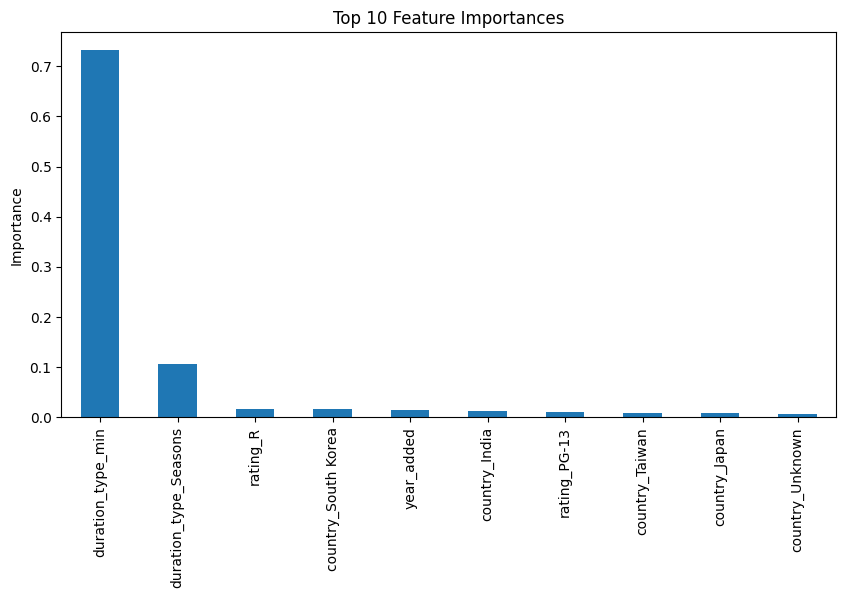

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

# Plot top 10 features
plt.figure(figsize=(10,5))
feat_importances.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.ylabel("Importance")
plt.show()


# **Text-Based AI**

#### Load Just The Text And Target

In [111]:
df_text = df[['type', 'title', 'description']].dropna()
df_text['type'] = df_text['type'].map({'Movie': 0, 'TV Show': 1})

#### Vectorize the Text (TF-IDF)

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use description field (you could also try 'title' later)
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df_text['description'])

y = df_text['type']

#### Train a Classifier on Text

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict + Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7715003138731952

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86      1157
           1       0.74      0.25      0.38       436

    accuracy                           0.77      1593
   macro avg       0.76      0.61      0.62      1593
weighted avg       0.77      0.77      0.73      1593



In [119]:
import numpy as np

# Get the weights (coefficients) from the model
feature_names = tfidf.get_feature_names_out()
coefficients = model.coef_[0]

# Top 15 words pushing toward "TV Show" (type 1)
top_tv = np.argsort(coefficients)[-15:]
print("Words more likely in TV Shows:")
for i in top_tv[::-1]:
    print(f"{feature_names[i]} ➝ {coefficients[i]:.3f}")

# Top 15 words pushing toward "Movie" (type 0)
top_movies = np.argsort(coefficients)[:15]
print("\nWords more likely in Movies:")
for i in top_movies:
    print(f"{feature_names[i]} ➝ {coefficients[i]:.3f}")


Words more likely in TV Shows:
series ➝ 5.884
adventures ➝ 2.887
world ➝ 2.588
mysteries ➝ 1.964
fun ➝ 1.958
power ➝ 1.768
docuseries ➝ 1.750
crimes ➝ 1.648
learn ➝ 1.623
women ➝ 1.577
specials ➝ 1.517
creatures ➝ 1.506
pop ➝ 1.492
contestants ➝ 1.474
secrets ➝ 1.465

Words more likely in Movies:
documentary ➝ -2.372
man ➝ -2.092
couple ➝ -1.984
film ➝ -1.689
special ➝ -1.591
comedian ➝ -1.588
shares ➝ -1.508
trip ➝ -1.446
india ➝ -1.387
soon ➝ -1.342
wedding ➝ -1.320
tour ➝ -1.319
save ➝ -1.315
friend ➝ -1.275
biopic ➝ -1.271


In [120]:
# Combine title and description into one text field
df_text['combined_text'] = df_text['title'] + " " + df_text['description']

# Vectorize the combined text instead of just the description
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_combined = tfidf.fit_transform(df_text['combined_text'])
y_combined = df_text['type']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Combined Text Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nCombined Text Classification Report:\n", classification_report(y_test, y_pred))


Combined Text Model Accuracy: 0.770872567482737

Combined Text Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86      1157
           1       0.74      0.25      0.37       436

    accuracy                           0.77      1593
   macro avg       0.76      0.61      0.62      1593
weighted avg       0.77      0.77      0.73      1593



In [121]:
# Use both unigrams and bigrams
tfidf_ngram = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2))
X_ngram = tfidf_ngram.fit_transform(df_text['combined_text'])
y_ngram = df_text['type']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X_ngram, y_ngram, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("N-Gram Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nN-Gram Classification Report:\n", classification_report(y_test, y_pred))


N-Gram Model Accuracy: 0.7752667922159447

N-Gram Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.86      1157
           1       0.75      0.27      0.39       436

    accuracy                           0.78      1593
   macro avg       0.77      0.62      0.63      1593
weighted avg       0.77      0.78      0.73      1593



In [122]:
# Use balanced class weights in Logistic Regression
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Balanced Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nBalanced Classification Report:\n", classification_report(y_test, y_pred))


Balanced Model Accuracy: 0.7457627118644068

Balanced Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      1157
           1       0.53      0.65      0.58       436

    accuracy                           0.75      1593
   macro avg       0.69      0.72      0.70      1593
weighted avg       0.77      0.75      0.75      1593



In [124]:
import nltk
from nltk.stem import WordNetLemmatizer
import re

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove non-alphabetic characters and lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    # Lemmatize each word
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

df_text['clean_text'] = df_text['combined_text'].apply(preprocess_text)

tfidf_clean = TfidfVectorizer(stop_words='english', max_features=5000)
X_clean = tfidf_clean.fit_transform(df_text['clean_text'])
y_clean = df_text['type']

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Preprocessed Text Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nPreprocessed Text Classification Report:\n", classification_report(y_test, y_pred))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jeevika_k1\AppData\Roaming\nltk_data...


Preprocessed Text Model Accuracy: 0.7545511613308223

Preprocessed Text Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      1157
           1       0.54      0.65      0.59       436

    accuracy                           0.75      1593
   macro avg       0.70      0.72      0.71      1593
weighted avg       0.77      0.75      0.76      1593



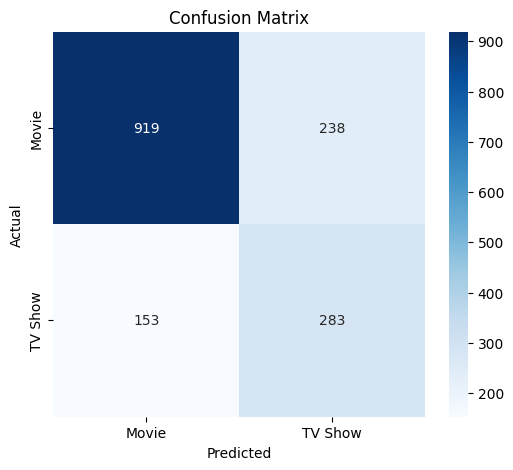

In [125]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Movie', 'TV Show'], yticklabels=['Movie', 'TV Show'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()